# 911 Calls Capstone Project

In this capstone project, I analyzed 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Data and Setup

____
**Import numpy and pandas**

In [180]:
import numpy as np
import pandas as pd

**Import visualization libraries and set %matplotlib inline.**

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read in the csv file as a dataframe called df**

In [182]:
df = pd.read_csv('911.csv')

**Check the info() of the df**

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Check the head of df**

In [184]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

**What are the top 5 zipcodes for 911 calls?**

In [185]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**What are the top 5 townships (twp) for 911 calls?**

In [186]:
df.rename(columns={"twp": "Township"}, inplace=True)
df['Township'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: Township, dtype: int64

**Take a look at the 'title' column, how many unique title codes are there?**

In [187]:
df['title'].nunique()

110

## Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. I will create a new column called "Reason" that contains this string value.** 

In [188]:
df['reason'] = df['title'].apply(lambda x:x.split(':')[0])

**What is the most common Reason for a 911 call based off of this new column?**

In [189]:
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

In [190]:
df['reason'].value_counts().idxmax()

'EMS'

**Now use seaborn to create a countplot of 911 calls by Reason.**

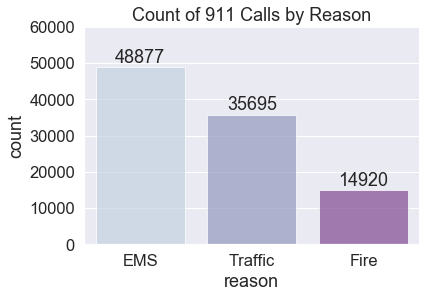

In [259]:
sns.set(font_scale=1.5)
splot = sns.countplot(x='reason', data=df, palette='BuPu', \
                      alpha=0.7, order = df['reason'].value_counts().index)
plt.ylim(0,60000)
sns.despine(top=True, right=True)
plt.title('Count of 911 Calls by Reason')

# add annotation to bins
for p in splot.patches:
    splot.annotate(format(p.get_height(), '0'), \
    (p.get_x() + p.get_width() / 2., p.get_height()), \
    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

___
**Now I will focus on time information. What is the data type of the objects in the timeStamp column?**

In [192]:
df['timeStamp'].dtype

dtype('O')

**These timestamps are still strings and I will convert the column from strings to DateTime objects.**

In [193]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

**Now that the timestamp column are actually DateTime objects, I will create 3 new columns called Hour, Month, and Day of Week.**

In [194]:
df.rename(columns={"e": "Count"}, inplace=True)

In [195]:
df['hour'] = df['timeStamp'].apply(lambda x:x.hour)

In [196]:
df['num_month'] = df['timeStamp'].apply(lambda x:x.month)

#change month from numbers to strings
df['month'] = df['timeStamp'].apply(lambda x:x.month)
mmap = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', \
        6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df['month'] = df['month'].map(mmap)

#turn month into a categorical variable so it's easier to sort 
df['month'] = pd.Categorical(df['month'], categories=list(mmap.values()), ordered=True)

In [197]:
df['day_of_week'] = df['timeStamp'].apply(lambda x:x.dayofweek)

#change day of week from numbers to strings
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['day_of_week'] = df['day_of_week'].map(dmap)

**Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

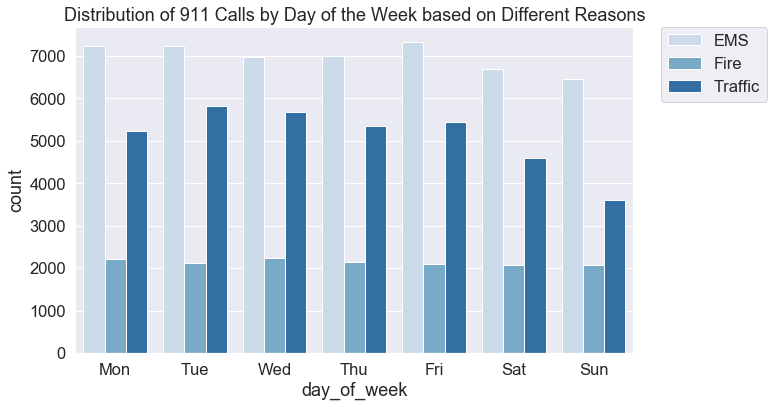

In [266]:
plt.figure(figsize=(10,6))
order_week = list(dmap.values())
sns.countplot(x='day_of_week', data=df, hue='reason', palette='Blues', order=order_week)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Distribution of 911 Calls by Day of the Week based on Different Reasons')
plt.show()

**Now do the same for Month:**

In [199]:
#order months based on total count of calls and excluding Sep/Oct/Nov (0 count)
month_order_by_count = list(df['month'].value_counts().index)[:-3]

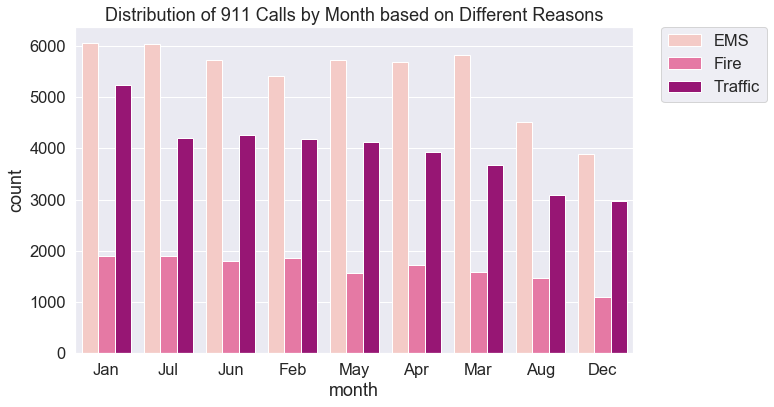

In [265]:
plt.figure(figsize=(10,6))
sns.countplot(x='month', data=df, \
              hue='reason', palette='RdPu', order=month_order_by_count)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Distribution of 911 Calls by Month based on Different Reasons')
plt.show()

**Now create a gropuby object called byMonth, where I group the DataFrame by the month column and use the count() method for aggregation.**

In [268]:
df2 = df.groupby('num_month').count()
df2

,lat,lng,desc,zip,title,timeStamp,Township,addr,Count,reason,hour,month,day_of_week,date
num_month,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969


**Now create a simple plot off of the dataframe indicating the count of calls per month.**

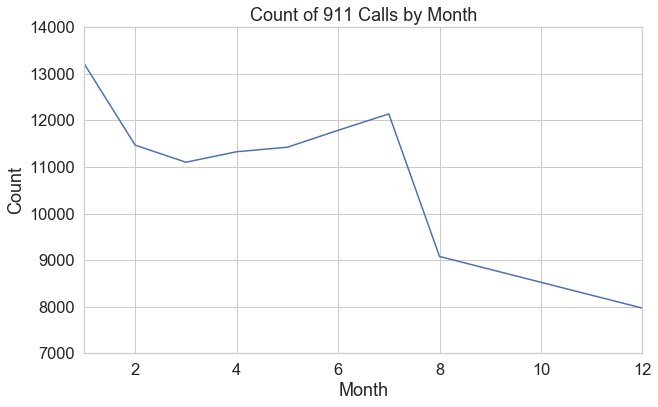

In [273]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
df2['Count'].plot()
plt.xlim(1,12)
plt.ylim(7000,14000)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of 911 Calls by Month')
plt.show()

**Now I will use seaborn's lmplot() to create a linear fit on the number of calls per month.**

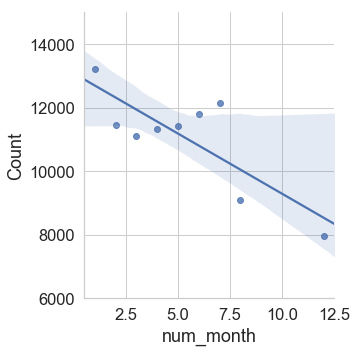

In [203]:
sns.lmplot(x='num_month',y='Count',data=df2.reset_index())
plt.xlim(0.5,12.5)
plt.ylim(6000,15000)
plt.show()

Since we are missing data from September, October and November, we can tell from the plot above that the confidence interval became too wide from 7 to 12. Therefore, linear regresson model is not a good fit based on the data we have.

**Create a new column called 'Date' that contains the date from the timeStamp column.** 

In [204]:
df['date'] = df['timeStamp'].apply(lambda x: x.date())

**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

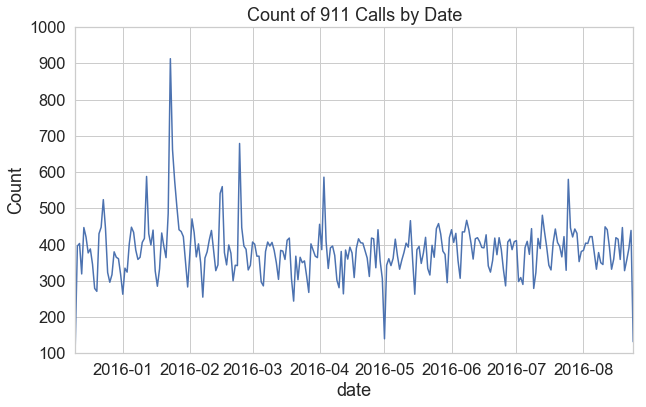

In [274]:
plt.figure(figsize=(10,6))
df3 = df.groupby('date').count()
df3.reset_index(inplace=True)
sns.lineplot(x='date',y='Count',data=df3)
plt.xlim(min(df3['date']),max(df3['date']))
plt.ylim(100,1000)
plt.title('Count of 911 Calls by Date')
plt.show()

**Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

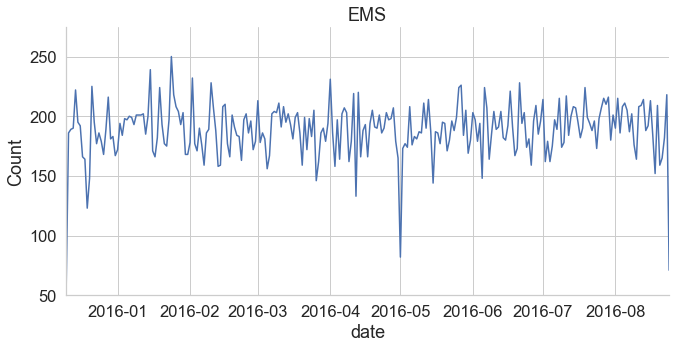

In [275]:
ems_df = df[df['reason']=='EMS']
c_ems_df = ems_df.groupby('date').count()
c_ems_df.reset_index(inplace=True)
c_ems_df.head()

sns.set_style()
sns.relplot(x='date',y='Count',data=c_ems_df, kind='line', height=5, aspect=2)
plt.xlim(min(c_ems_df['date']),max(c_ems_df['date']))
plt.ylim(50,275)
plt.title('EMS')
plt.show()

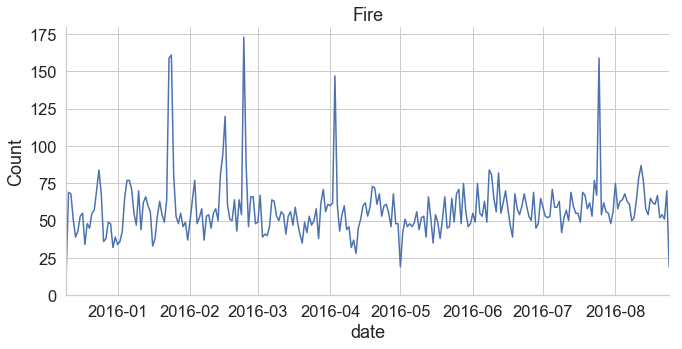

In [276]:
fire_df = df[df['reason']=='Fire']
fire_df.head()
c_fire_df = fire_df.groupby('date').count()
c_fire_df.reset_index(inplace=True)
c_fire_df.head()
sns.relplot(x='date',y='Count',data=c_fire_df, kind='line', height=5, aspect=2)
plt.xlim(min(c_fire_df['date']),max(c_fire_df['date']))
plt.ylim(0,180)
plt.title('Fire')
plt.show()

Text(0.5,1,'Traffic')

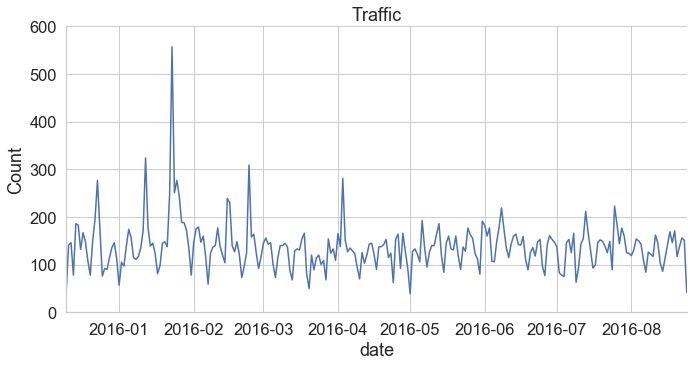

In [209]:
traffic_df = df[df['reason']=='Traffic']
traffic_df.head()
c_traffic_df = traffic_df.groupby('date').count()
c_traffic_df.reset_index(inplace=True)
c_traffic_df.head()
sns.relplot(x='date',y='Count',data=c_traffic_df, kind='line', height=5, aspect=2)
plt.xlim(min(c_fire_df['date']),max(c_fire_df['date']))
plt.ylim(0,600)
plt.title('Traffic')

____
**Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.**

In [210]:
df4 = df[['day_of_week','hour','Count']].groupby(['day_of_week','hour']).count()
df4 = df4.unstack(level=1)
#remove e from column
df4.columns = df4.columns.droplevel()
df4

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


**Now create a HeatMap using this new DataFrame.**

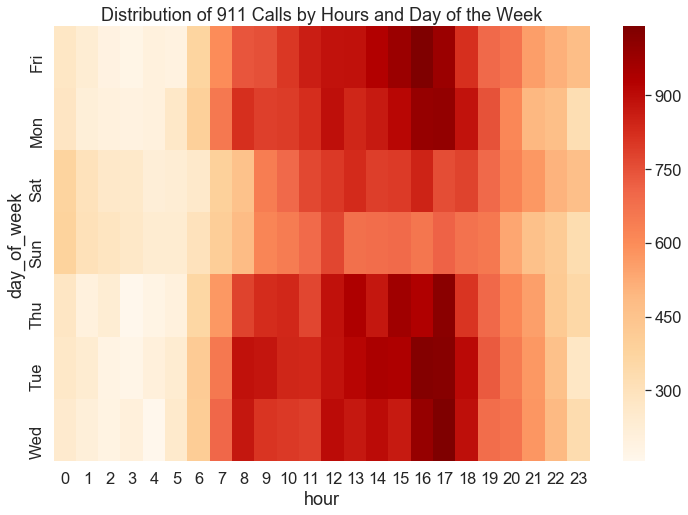

In [295]:
plt.figure(figsize=(12,8))
sns.heatmap(df4, cmap='OrRd')
plt.title('Distribution of 911 Calls by Hours and Day of the Week')
plt.show()

**Now create a clustermap using this DataFrame.**

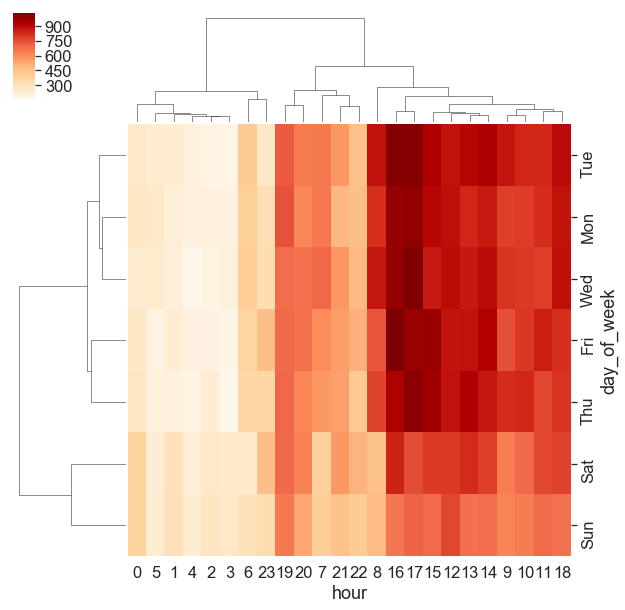

In [293]:
sns.clustermap(df4,cmap='OrRd')

**Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.**

In [213]:
df5 = df[['num_month','day_of_week','Count']].groupby(['day_of_week','num_month']).count()
df5 = df5.unstack(level=1)
df5.columns = df5.columns.droplevel()
df5

num_month,1,2,3,4,5,6,7,8,12
day_of_week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


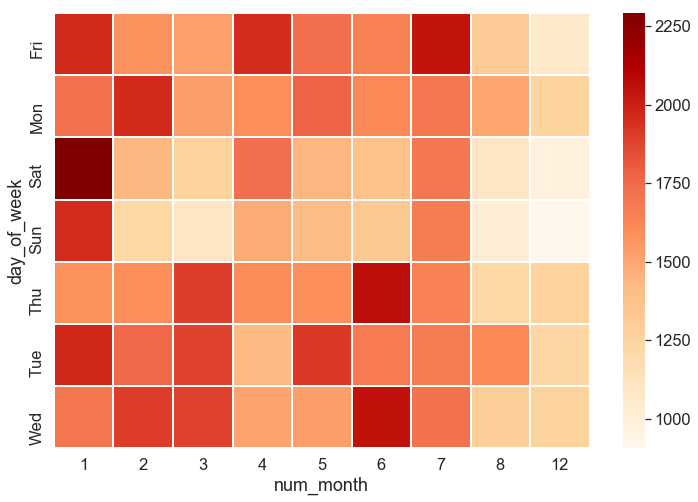

In [288]:
plt.figure(figsize=(12,8))
sns.heatmap(df5, cmap='OrRd', lw=1)

<Figure size 864x576 with 0 Axes>

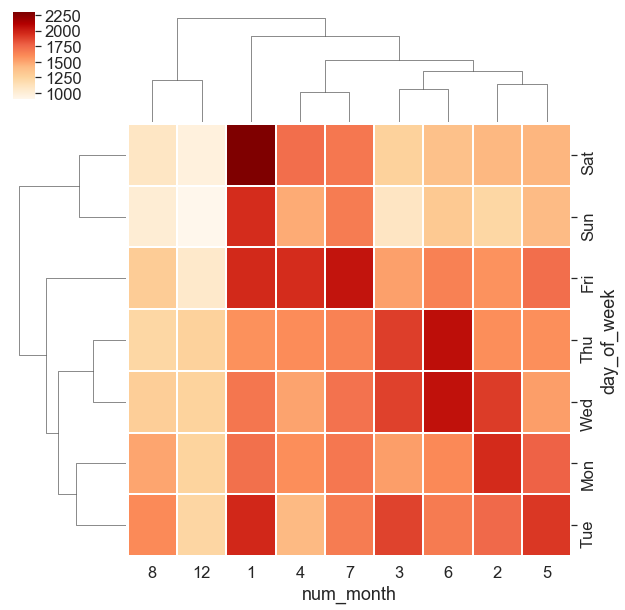

In [289]:
plt.figure(figsize=(12,8))
sns.clustermap(df5, cmap='OrRd', lw=1)
plt.show()

### Use interactive violin plot to check the distribution of calls through out the day based on different reasons

In [216]:
import plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [217]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [218]:
import cufflinks as cf

In [219]:
# For offline use
cf.go_offline()
init_notebook_mode(connected=True) 

In [321]:
fig = go.Figure()

reasons = ['EMS', 'Fire', 'Traffic']

for r in reasons:
    fig.add_trace(go.Violin(x=df['reason'][df['reason'] == r],
                            y=df['hour'][df['reason'] == r],
                            name=r,
                            box_visible=True,
                            meanline_visible=True),
                            )
fig.update_layout(
    title="Reason for 911 Calls by Hour",
    xaxis_title="Hour",
    yaxis_title="Reason",
    font=dict(
        family="Arial, Helvetica, sans-serif",
        size=18,
        color="#7f7f7f"
    )
)

f2 = go.FigureWidget(fig)
f2

FigureWidget({
    'data': [{'box': {'visible': True},
              'meanline': {'visible': True},
          …

<img src='violin.png'> </img>

### Compare the average and total number of calls by hour between Abington and Norristown

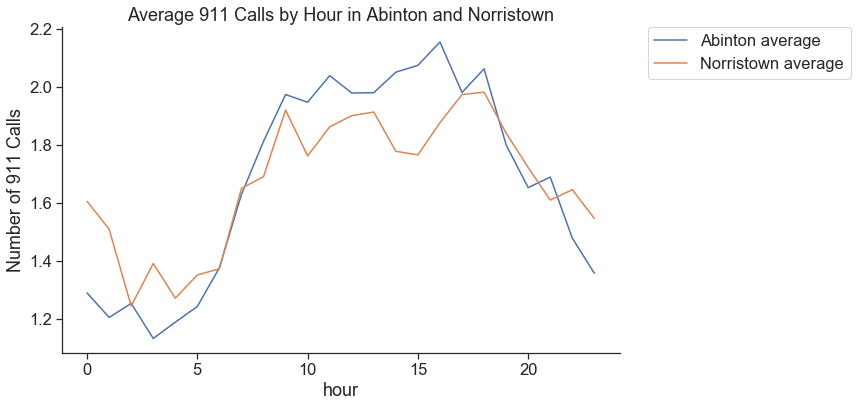

In [317]:
new_df = df[df['Township'].isin(['ABINGTON','NORRISTOWN'])].groupby(['Township','date','hour']).count()

#get hourly mean of calls in Abinton
ab = new_df.loc[('ABINGTON'),'Count'].to_frame()
new_ab = ab.groupby('hour').mean()
new_ab.rename(columns={'Count':'Abinton average'}, inplace=True)

#get hourly mean of calls in Norristown
no = new_df.loc[('NORRISTOWN'),'Count'].to_frame()
new_no = no.groupby('hour').mean()
new_no.rename(columns={'Count':'Norristown average'}, inplace=True)

#merge two dateframes for the plot
compare = new_ab.merge(new_no,how='inner',on='hour')

compare.plot(figsize=(10,6))
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.set_style('ticks')
sns.despine()
plt.ylabel('Number of 911 Calls')
plt.title('Average 911 Calls by Hour in Abinton and Norristown')
plt.show()

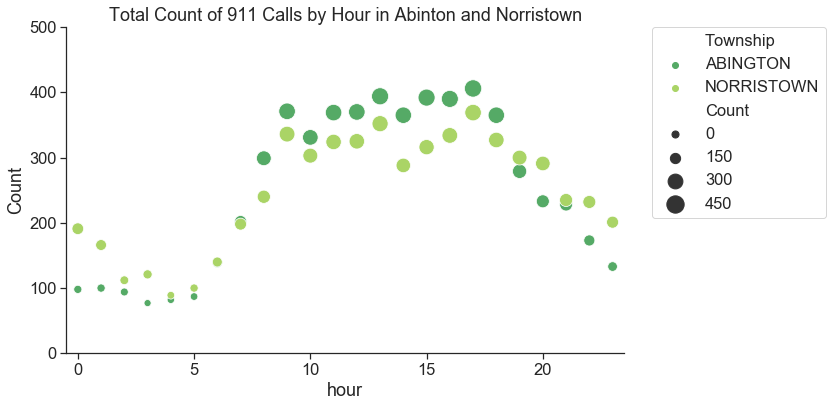

In [305]:
sns.set(font_scale=1.5)
plt.figure(figsize=(10,6))
avsn = df[df['Township'].isin(['ABINGTON','NORRISTOWN'])].groupby(['Township','hour']).count()
avsn.reset_index(inplace=True)
sns.scatterplot(x='hour',y='Count',hue='Township',data=avsn,sizes=(50,300),size=avsn['Count'],palette='summer')
plt.xlim(-0.5,23.5)
plt.ylim(0,500)
sns.despine()
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Total Count of 911 Calls by Hour in Abinton and Norristown')
plt.show()

### Plot a choropleth map of 911 calls distribution based on township

In [223]:
# Import libraries
import requests
from bs4 import BeautifulSoup

In [224]:
page = requests.get('https://www.montcopa.org/850/Municipal-Websites')
# Create a BeautifulSoup object
soup = BeautifulSoup(page.text, 'html.parser')

In [225]:
township_list = soup.find(id='divEditorec777340-f087-466e-91ed-ec166feb2198')

In [226]:
township_list = township_list.table.tbody

In [227]:
#create a list that includes uppercase townships/boroughs
ls= []
for township in township_list.find_all('a'):
    if township.contents[0] != ' ':
        ls.append(township.contents[0].strip())

new_ls = list(map(lambda x:' '.join(x.split()[:-1]), ls))
new_ls.extend(ls)
new_ls = list(map(str.upper, new_ls))

In [228]:
montgomery = df[df['Township'].isin(new_ls)]

In [229]:
#check counties excluded
df[~df['Township'].isin(new_ls)]['Township'].unique()

array(['DELAWARE COUNTY', 'CHESTER COUNTY', 'HATFIELD BORO',
       'LEHIGH COUNTY', nan, 'BUCKS COUNTY', 'BERKS COUNTY',
       'PHILA COUNTY'], dtype=object)

In [230]:
#add hatfield boro to the table
montgomery = df[(df['Township'].isin(new_ls)) | (df['Township']=='HATFIELD BORO')]

In [231]:
montgomery1 = montgomery.groupby('Township').count()

In [232]:
montgomery1.reset_index(inplace=True)

In [233]:
from urllib.request import urlopen
import json
with urlopen('https://services1.arcgis.com/kOChldNuKsox8qZD/arcgis/rest/services/Montgomery_County_Municipal_Boundaries/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json') as response:
    towns = json.load(response)

towns["features"][0]['attributes']['Name']

'Abington'

In [253]:
#create a new column for capitalized township names
montgomery1['Township Name'] = montgomery1['Township'].apply(lambda x:' '.join(map(str.capitalize,x.split())))

In [254]:
#turn json file into geojson format
geo_list = []
for i in range(len(towns["features"])):
    geo_dict = {"type": "Feature", \
                "geometry": {"type": "Polygon", \
                             "coordinates": [123, 45]}, \
                             "properties": {"name": "Yinying"}}
    if towns["features"][i]['attributes']['Name'] == 'Hatfield Twp':
        geo_dict['properties']['name'] = 'Hatfield Township'
    else:   
        geo_dict['properties']['name'] = towns["features"][i]['attributes']['Name']
    geo_dict['geometry']['coordinates'] = towns["features"][i]['geometry']['rings']
    geo_list.append(geo_dict)

new_geojson = {'type': 'FeatureCollection', 'features':geo_list}

In [309]:
import plotly.express as px

fig = px.choropleth_mapbox(montgomery1, geojson=new_geojson,color='Count',color_continuous_scale='portland', opacity=0.8,
                           locations="Township Name", featureidkey="properties.name",
                           center={"lat": 40.21, "lon": -75.35},
                           mapbox_style="carto-positron", zoom=8.5)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
f3 = go.FigureWidget(fig)
f3

<img src='map.png'> </img>

### The End